In [1]:
library('TSclust')

Loading required package: wmtsa
Loading required package: pdc
Loading required package: cluster


In [40]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")

In [3]:
sept_perc = sept_ts()
june_perc = june_ts()

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [4]:
sept_days = split_by_day(sept_perc)
colnames(sept_days) = c(1:28)

In [5]:
june_days = split_by_day(june_perc)
colnames(june_days) = c(102:129)

In [20]:
combined = cbind(june_days, sept_days)

In [7]:
normed_combined = data.frame(apply(combined, 2, normalize))

In [8]:
colnames(normed_combined) =c(c(1:28), c(102:129))

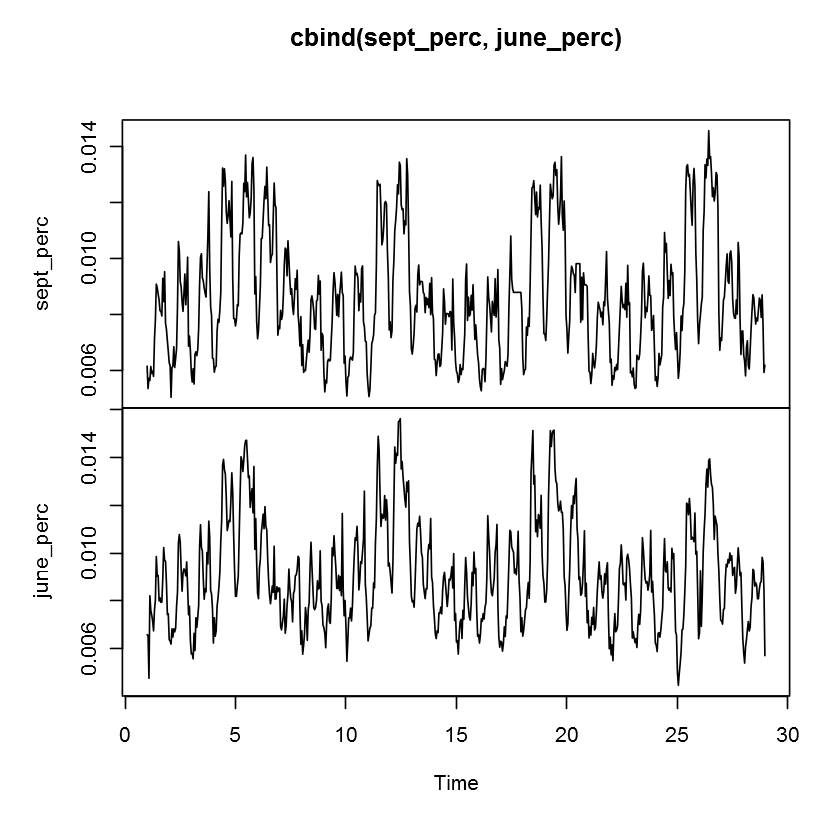

In [9]:
plot.ts(cbind(sept_perc, june_perc))

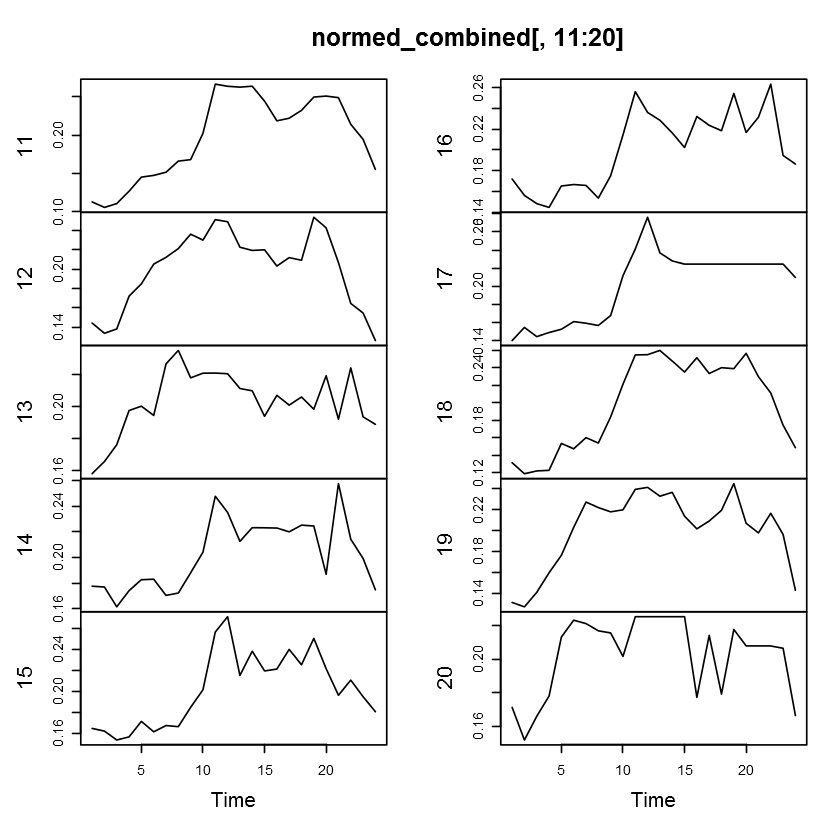

In [10]:
plot.ts(normed_combined[,11:20])

In [52]:
phase_diss = dissimilarity(as.matrix(combined), phase_dist(1))

In [37]:
days = paste(rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 8), c(paste(rep('J', 28), 2:29, sep=''), paste(rep('S', 28), 1:28,sep='')),sep='')

In [35]:
weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 8)

In [34]:
days

[1] "Tu June2"  "W June3"   "Th June4"  "F June5"   "Sa June6"  "Su June7" 
 [7] "M June8"   "Tu June9"  "W June10"  "Th June11" "F June12"  "Sa June13"
[13] "Su June14" "M June15"  "Tu June16" "W June17"  "Th June18" "F June19" 
[19] "Sa June20" "Su June21" "M June22"  "Tu June23" "W June24"  "Th June25"
[25] "F June26"  "Sa June27" "Su June28" "M June29"  "Tu Sept1"  "W Sept2"  
[31] "Th Sept3"  "F Sept4"   "Sa Sept5"  "Su Sept6"  "M Sept7"   "Tu Sept8" 
[37] "W Sept9"   "Th Sept10" "F Sept11"  "Sa Sept12" "Su Sept13" "M Sept14" 
[43] "Tu Sept15" "W Sept16"  "Th Sept17" "F Sept18"  "Sa Sept19" "Su Sept20"
[49] "M Sept21"  "Tu Sept22" "W Sept23"  "Th Sept24" "F Sept25"  "Sa Sept26"
[55] "Su Sept27" "M Sept28"

Phase shift dissimilarity. Saturdays and Sundays have different phase.

Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 2  1  1  1  1  1  1  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1 
 F Sa Su  M 
 1  2  2  1 


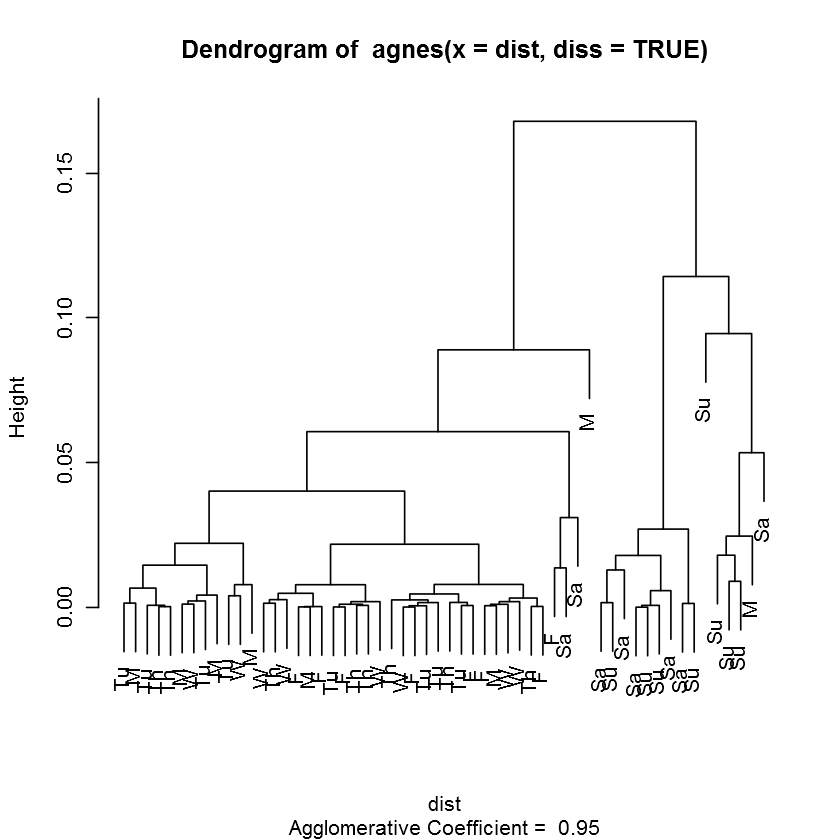

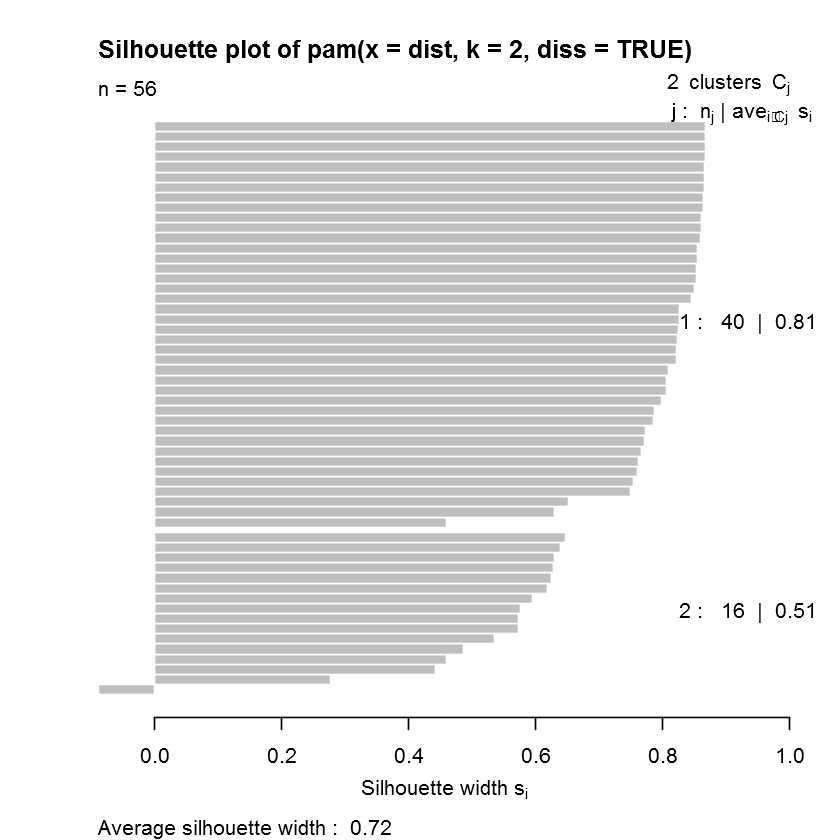

In [53]:
dist = phase_diss
colnames(dist)=weekdays
rownames(dist)=weekdays
clust(dist)

In [51]:
phase_clust_plot <- function(){
dist = phase_diss
colnames(dist)=weekdays
rownames(dist)=weekdays
plot(agnes(dist), which.plots=2)
}
save_png(phase_clust_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/phase-clust.png')

png 
  2

In [54]:
sept.1 = as.numeric(window(sept_perc, start=c(1, 1), end= c(7, 24)))
sept.2 = as.numeric(window(sept_perc, start=c(8, 1), end= c(14, 24)))
sept.3 = as.numeric(window(sept_perc, start=c(15, 1), end= c(21, 24)))
sept.4 = as.numeric(window(sept_perc, start=c(22, 1), end= c(28, 24)))
june.1 = as.numeric(window(june_perc, start=c(1, 1), end= c(7, 24)))
june.2 = as.numeric(window(june_perc, start=c(8, 1), end= c(14, 24)))
june.3 = as.numeric(window(june_perc, start=c(15, 1), end= c(21, 24)))
june.4 = as.numeric(window(june_perc, start=c(22, 1), end= c(28, 24)))

In [55]:
weeks = data.frame(sept.1, sept.2, sept.3, sept.4, june.1, june.2, june.3, june.4)

In [56]:
dpm = dissimilarity(as.matrix(weeks), daily_phase_dist(8))
rownames(dpm) = colnames(weeks)
colnames(dpm) = colnames(weeks)

ERROR: Error: could not find function "daily_phase_dist"


In [35]:
plot_weeks <- function(){
    plot.ts(weeks, main='Week by week comparison')
    
}
save_png(plot_weeks, 'c:/users/tom work/pycharmprojects/twipsy-lite/plots/tweets-by-week.png')

png 
  2

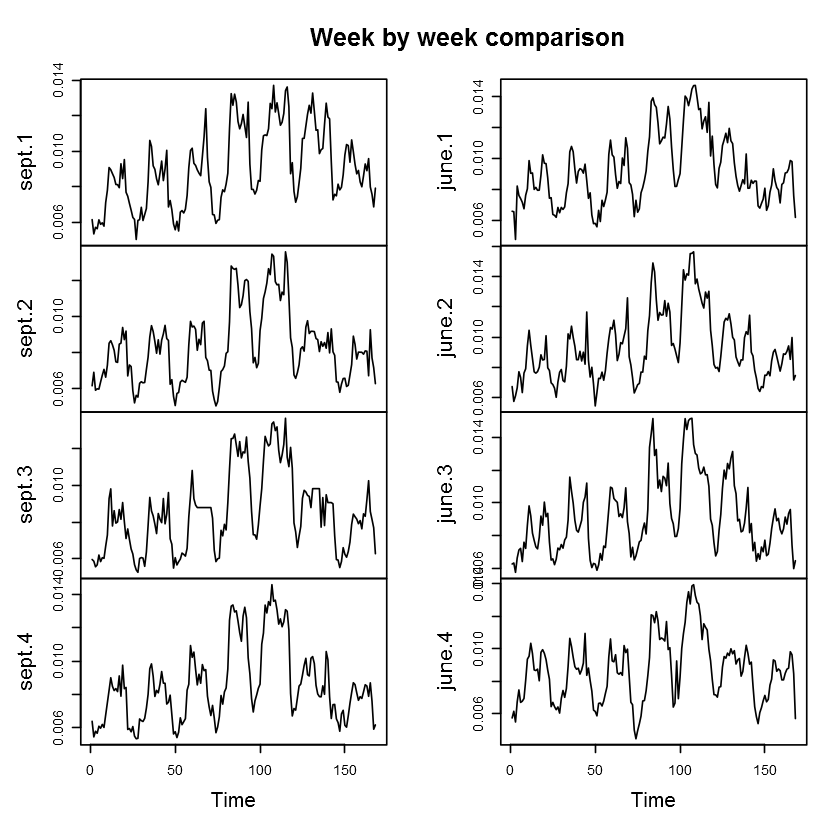

In [22]:
plot.ts(weeks, main='Week by week comparison')

We look at Euc dist between days, basically comparing shape and magnitude. The dendogram is interesting, prob need more than 2 clusters, need to use silhouette.

Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  2  2  2  1  1  1  1  2  2  2  1  1  1  1  2  2  2  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 1  1  1  1  1  2  2  2  1  1  1  1  1  2  1  1  1  1  1  2  2  1  1  1  1  1 
 F Sa Su  M 
 2  2  1  1 


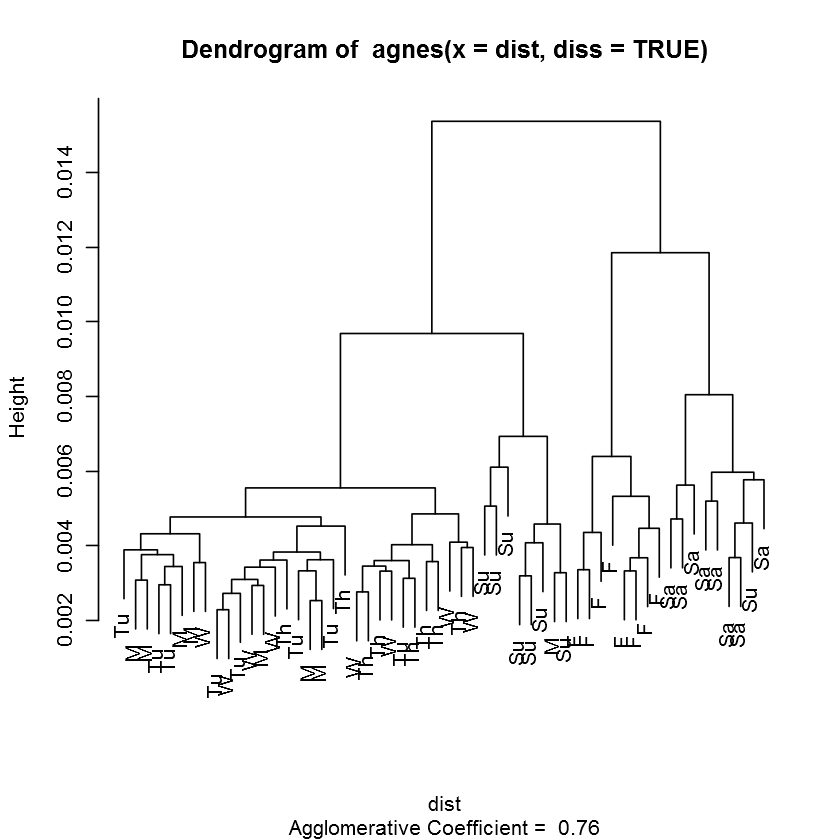

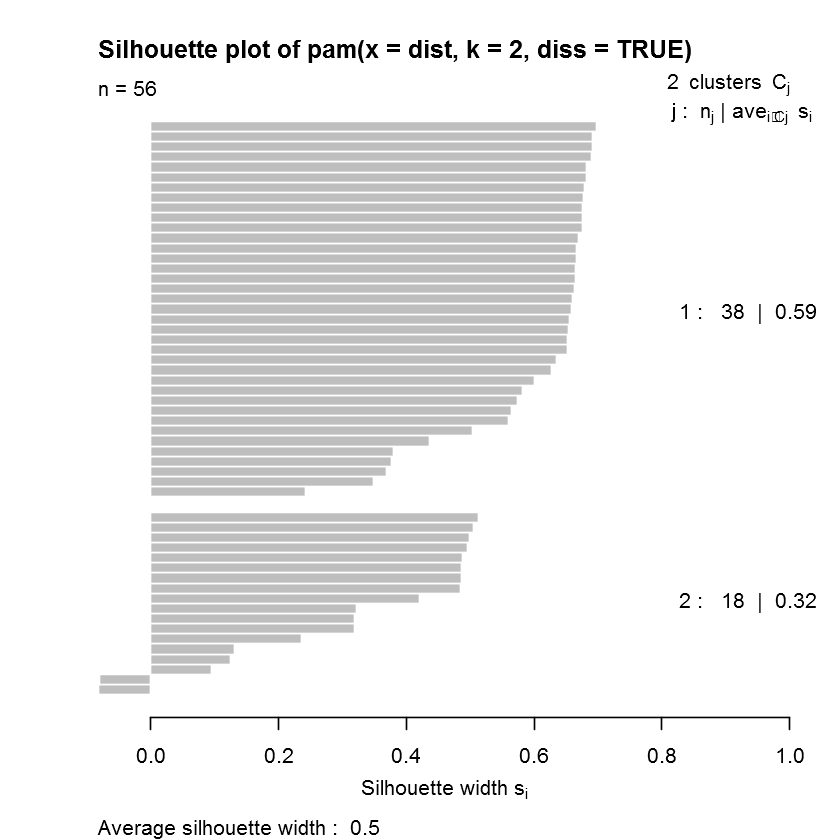

In [68]:
colnames(combined)=weekdays
dist = diss(combined, METHOD='EUCL')
clust(dist)

In [71]:
phase_clust_plot <- function(){
colnames(combined)=weekdays
dist = diss(combined, METHOD='EUCL')
# clust(dist)
plot(agnes(dist), which.plots=2)
}
save_png(phase_clust_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/euc-day-clust.png')

png 
  2

Dynamic time warping. Seperates out Sunday/Monday/Tuesday

In [65]:
cur_sup <- function(ts){
    return (filter(ts, sides=2, rep(1,5)/5)[3:(length(ts)-2)])
}

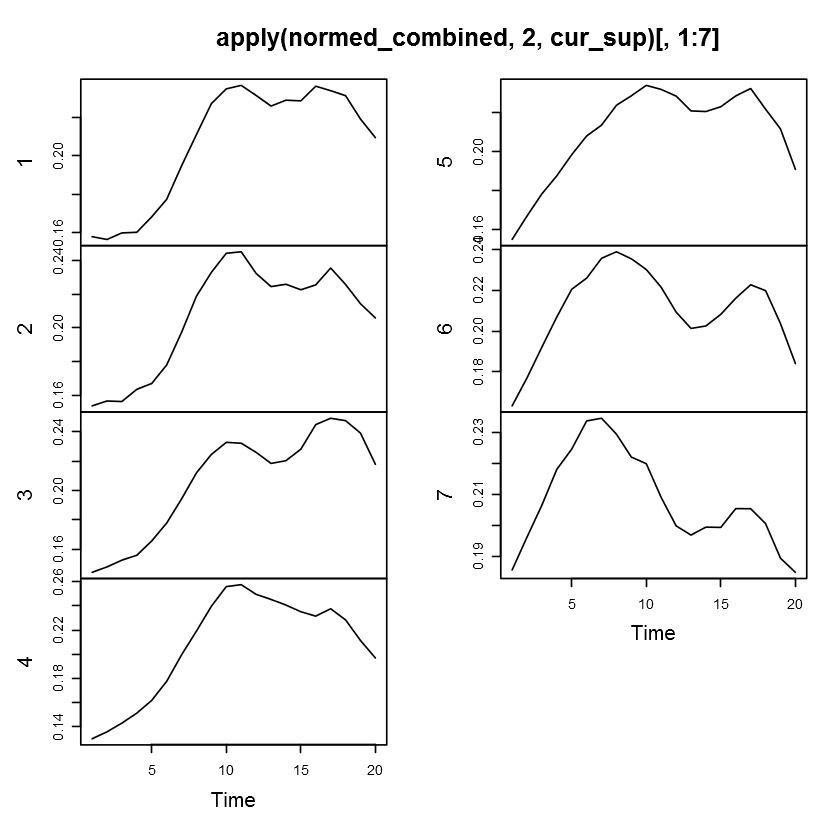

In [69]:
plot.ts(apply(normed_combined, 2, cur_sup)[,1:7])

Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  2  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 1  1  1  1  1  2  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1 
 F Sa Su  M 
 2  2  1  1 


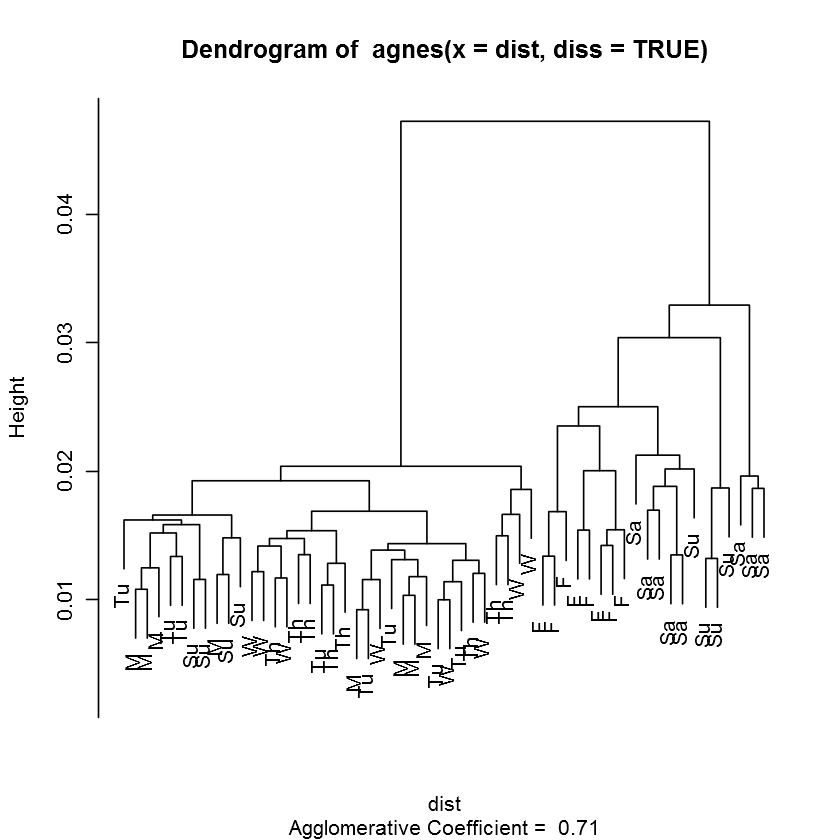

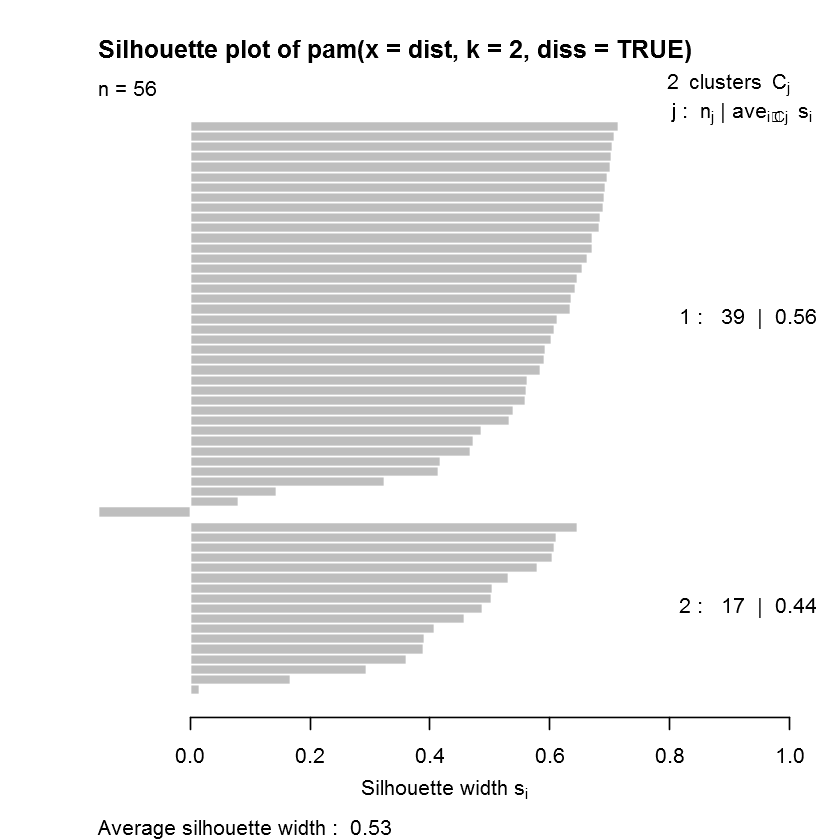

In [69]:
dist = diss(combined, METHOD='DTW')
clust(dist)